In [1]:
!pip install pydot graphviz


In [2]:
!pip install pydotplus


In [3]:
#!/usr/bin/env pyhton3
# -*- coding 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from utils.helper import fn_plot_tf_hist

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Introduction to tensorFlow


In [6]:
# Global variables
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE)
N_SAMPLE = 1000
TEST_SIZE = 0.2
ALPHA = 0.1 # learning rate
NOISE = 0.2 # Error
EPOCHS = 200

In [7]:
tf.random.set_seed?


Signature: tf.random.set_seed(seed)
Docstring:
Sets the global random seed.

Operations that rely on a random seed actually derive it from two seeds:
the global and operation-level seeds. This sets the global seed.

Its interactions with operation-level seeds is as follows:

  1. If neither the global seed nor the operation seed is set: A randomly
    picked seed is used for this op.
  2. If the global seed is set, but the operation seed is not:
    The system deterministically picks an operation seed in conjunction with
    the global seed so that it gets a unique random sequence. Within the
    same version of tensorflow and user code, this sequence is deterministic.
    However across different versions, this sequence might change. If the
    code depends on particular seeds to work, specify both global
    and operation-level seeds explicitly.
  3. If the operation seed is set, but the global seed is not set:
    A default global seed and the specified operation seed are used to
  

In [8]:
inpDir = './input'
outDir = './output'

In [9]:
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,4),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


## Load Data
Sklearn make_moons

In [11]:
X,y = datasets.make_moons(
        n_samples = N_SAMPLE,
        noise = NOISE,
        shuffle  = True,
        random_state = RANDOM_STATE
)
X.shape, y.shape

((1000, 2), (1000,))

EDA 
1: plot data

<Axes: xlabel='A', ylabel='B'>

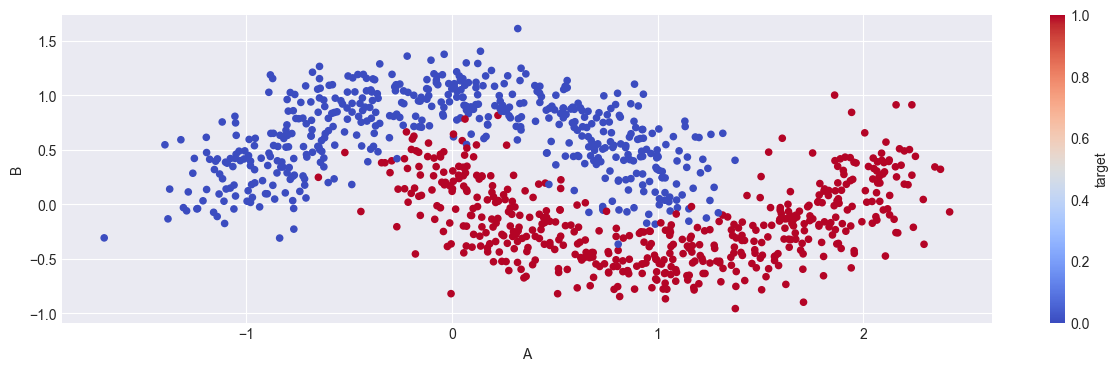

In [13]:

data_df = pd.DataFrame(X, columns = ('A','B'))
data_df['target'] = y
data_df.head()

data_df.plot.scatter('A','B',c= 'target', cmap=CMAP)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [15]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,), name = 'input'), # input layer
    tf.keras.layers.Dense(5, activation = 'relu', name = 'fc_1'), # Hidden layer called dense in tensorflow
    tf.keras.layers.Dense(5, activation = 'relu',  name = 'fc_2'),# node called as unit
    tf.keras.layers.Dense(4, activation = 'relu', name = 'fc_3'),# fully connected layer(Fc)
    tf.keras.layers.Dense(3, activation = 'relu',  name = 'fc_4'),
    tf.keras.layers.Dense(2, name = 'output')
    
])

In [16]:
 tf.keras.layers.Dense?


Init signature:
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: If the input to the layer has a rank greater than 2, `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_size, d0, d1)`

In [17]:
## Unit testing

In [18]:
prediction = model(X_train[:1]).numpy()
prediction.sum()

-0.25149265

In [19]:
tf.nn.softmax(prediction).numpy().sum()

0.9999999

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                         │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
tf.keras.utils.plot_model(model, "My_first_model.png",
                         show_shapes = True,show_dtype=True,
                         show_layer_names = True)

AttributeError: module 'pydotplus' has no attribute 'PydotException'

In [65]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal

In [67]:
loss_fn(y_train[:1], prediction).numpy()

0.6365336

In [28]:
model.compile(optimizer = 'adam', # optimisation, loss calculation 
             loss = loss_fn,
              metrics = ['accuracy']
             )

In [40]:
history = model.fit(x = X_train, y = y_train, 
                    validation_data = [X_test, y_test],
                    epochs =EPOCHS
                   )

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7832 - loss: 0.6530 - val_accuracy: 0.8450 - val_loss: 0.6219
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8267 - loss: 0.6215 - val_accuracy: 0.8850 - val_loss: 0.5853
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.5877 - val_accuracy: 0.8900 - val_loss: 0.5461
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8525 - loss: 0.5525 - val_accuracy: 0.8950 - val_loss: 0.5101
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.5209 - val_accuracy: 0.8900 - val_loss: 0.4800
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.4957 - val_accuracy: 0.8900 - val_loss: 0.4561
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.4758 - val_accuracy: 0.8900 - val_loss: 0.4366
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8839 - loss: 0.4599 - val_accuracy: 0.8850 - v

,accuracy,loss,val_accuracy,val_loss
0,0.84625,0.640289,0.845,0.621892
1,0.86750,0.604997,0.885,0.585324
2,0.87750,0.566962,0.890,0.546094
3,0.88500,0.528379,0.895,0.510137
4,0.89375,0.494690,0.890,0.480019


<Axes: >

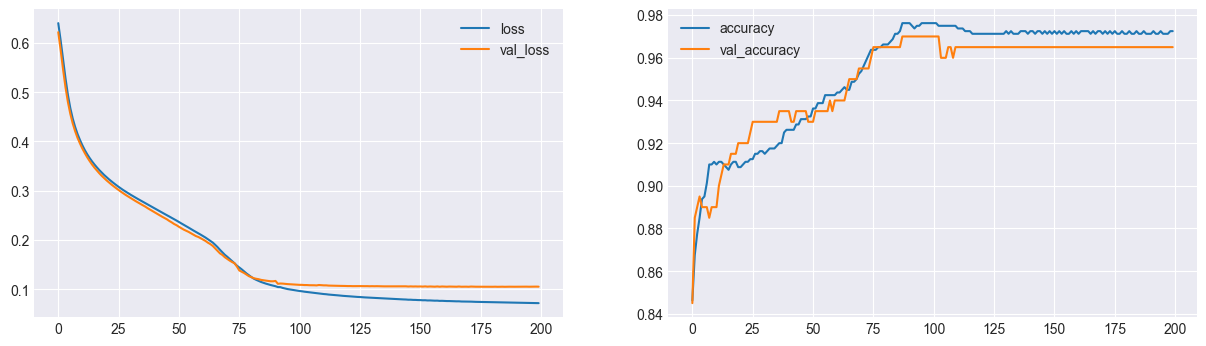

In [42]:
hist_df = pd.DataFrame(history.history) #Dictionary
display(hist_df.head())
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [75]:
pd.DataFrame(history.history)


,accuracy,loss,val_accuracy,val_loss
0,0.84625,0.640289,0.845,0.621892
1,0.86750,0.604997,0.885,0.585324
2,0.87750,0.566962,0.890,0.546094
3,0.88500,0.528379,0.895,0.510137
4,0.89375,0.494690,0.890,0.480019
...,...,...,...,...
195,0.97125,0.072147,0.965,0.105129
196,0.97125,0.072097,0.965,0.105232
197,0.97125,0.071992,0.965,0.105248
198,0.97250,0.071940,0.965,0.105333


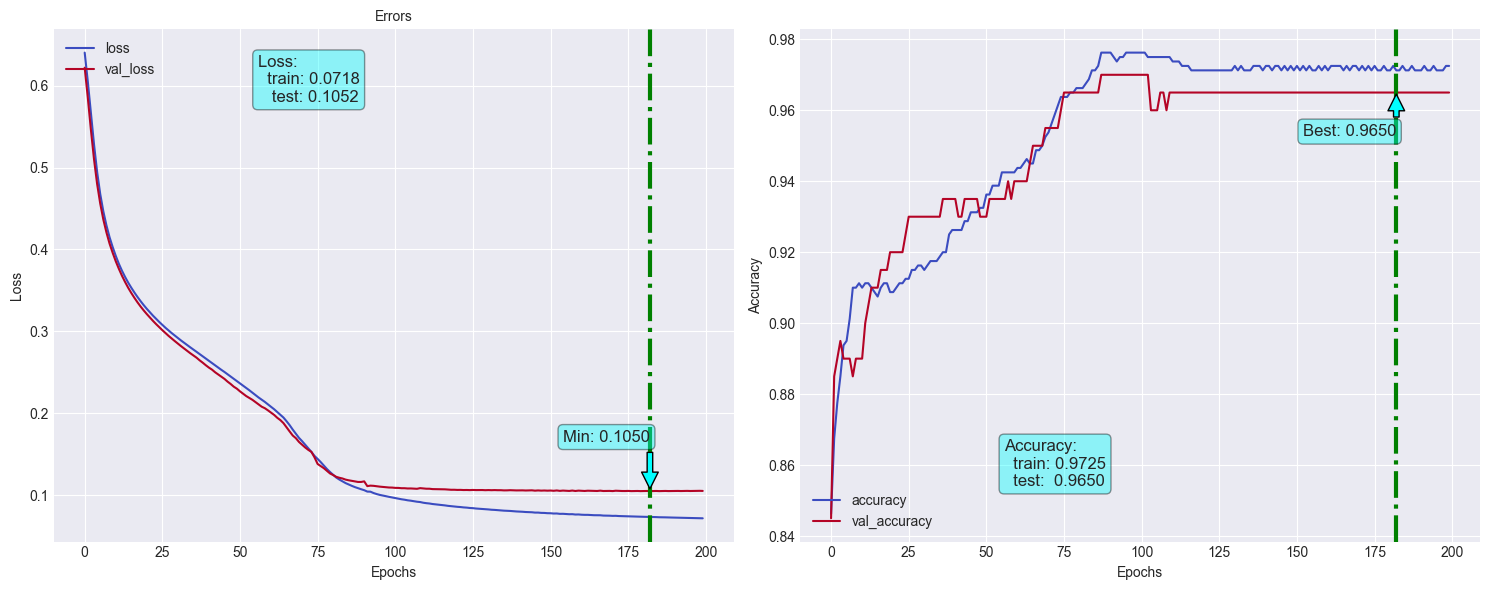

In [44]:
fn_plot_tf_hist(hist_df = hist_df)

In [46]:
y_pred = model.predict(X_train)
accuracy_score(y_true= y_train, y_pred = y_pred.argmax(axis=1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.97625

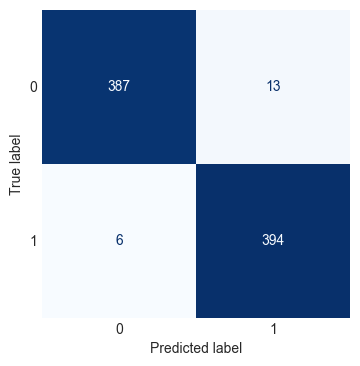

In [63]:
cm = confusion_matrix(y_true=y_train, y_pred= y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [ ]:
y_pred = predict(model, X_test)
accuracy_score(y_true = y_test, y_pred = y_pred)


In [83]:
#1.1**1000

2.4699329180060256e+41

In [77]:
################### Don't look Down

In [ ]:
rng = np.random.default_rng(seed=RANDOM_STATE)
def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(data_train.shape[1]) # randomly generated weights
    m= train.shape[0] # number of samples
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1] # a-y
            sum_error +=  - row[-1] * np.log(prediction) # sum of squared error
            weights[0] +=  - alpha * dz / m # calculating and adjusting weights by alpha multiplication and  divide with whole row no. to get error for whole set
            for i in range(len(row) - 1):
                weights[i+1] += -alpha * row[i] * dz / m
        errors.append(sum_error / m)
    return errors, weights

In [ ]:
def predict(model, X_p):
    W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
    b1,b2,b3,b4,b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']
    # Layer1 
    z1 = X_p.dot(W1) + b1 # Aggregation function
    a1 = fn_actv(z1) ## Activation function
    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation function
    a2 = fn_actv(z2) ## Activation function
    #Layer 3
    z3 = a2.dot(W3) + b3 # Aggregation function
    a3 = fn_actv(z3) ## Activation function
     #Layer 4
    z4 = a3.dot(W4) + b4 # Aggregation function
    a4 = fn_actv(z4) ## Activation function
    
     #Layer 5
    z5 = a4.dot(W5) + b5 # Aggregation function
    a5 = softmax(z5) ## Activation function

    return a5.argmax(axis=1)


In [ ]:
def fn_calculate_loss(model, X_l, y_l):
    W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
    b1,b2,b3,b4,b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']

    m = X_l.shape[0]
    
    # Layer1 
    z1 = X_l.dot(W1) + b1 # Aggregation function
    a1 = fn_actv(z1) ## Activation function
    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation function
    a2 = fn_actv(z2) ## Activation function
    #Layer 3
    z3 = a2.dot(W3) + b3 # Aggregation function
    a3 = fn_actv(z3) ## Activation function
     #Layer 4
    z4 = a3.dot(W4) + b4 # Aggregation function
    a4 = fn_actv(z4) ## Activation function
    
     #Layer 5
    z5 = a4.dot(W5) + b5 # Aggregation function
    a5 = softmax(z5) ## Activation function
    data_loss = -(y_l * np.log(a5) + (1 - y_l)*np.log(1-a5)).sum()
    return data_loss / m

In [ ]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(z): # Differentiation of Tanh()
    return 1 - (np.tanh(z))**2

In [ ]:
fn_actv(np.array([[-1,0,1],[-np.inf,0,np.inf]]))

In [ ]:
# def predict():
#     z = 1
#     return sigmoid(z) # stepwise Activation Function
        

In [ ]:
def fn_loss_calculate_loss():
    pass

## Split DATA in Test Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
def build_model(param, X_t, y_t, n_epochs= EPOCHS, alpha = ALPHA):
    '''
    5-5-4-3
    '''
    # get dimensions for weights init
    m = X_t.shape[0]
    
    # initialize weights
    W1 = rng.random((param[0], param[1]), dtype = np.float32) / np.sqrt(param[0])
    W2 = rng.random((param[1], param[2]), dtype = np.float32)/np.sqrt(param[1])
    W3 = rng.random((param[2], param[3]), dtype = np.float32)/np.sqrt(param[2]) 
    W4 = rng.random((param[3], param[4]), dtype = np.float32)/np.sqrt(param[3])
    W5 = rng.random((param[4], param[5]), dtype = np.float32)/np.sqrt(param[4])
    
    # initialize bias
    b1 = np.zeros((1,param[1]), dtype = np.float32)
    b2 = np.zeros((1,param[2]), dtype = np.float32)
    b3 = np.zeros((1,param[3]), dtype = np.float32)
    b4 = np.zeros((1,param[4]), dtype = np.float32)
    b5 = np.zeros((1,param[5]), dtype = np.float32)

    # print(W1.shape, W2.shape, W3.shape, W4.shape, W5.shape)
    # print(b1.shape, b2.shape, b3.shape, b4.shape, b5.shape)
    
    curr_loss = 0
    loss = []
    # loss_hist = {}
    epoch = []
    for i in range(n_epochs):
        ### Forwards propagation
        # Layer1 
        z1 = X_t.dot(W1) + b1 # Aggregation function
        a1 = fn_actv(z1) ## Activation function
        # Layer 2
        z2 = a1.dot(W2) + b2 # Aggregation function
        a2 = fn_actv(z2) ## Activation function
    #Layer 3
        z3 = a2.dot(W3) + b3 # Aggregation function
        a3 = fn_actv(z3) ## Activation function
         #Layer 4
        z4 = a3.dot(W4) + b4 # Aggregation function
        a4 = fn_actv(z4) ## Activation function

         #Layer 5
        z5 = a4.dot(W5) + b5 # Aggregation function
        a5 = softmax(z5) ## Activation function

    # # Layer2
    #     z2 = a1.dot(W2) + b2 # Aggregation function
    #     a2 = sigmoid(z2)# Activation function

        ### Back Propagation
        ## Layer 5
        dz5 = a5 - y_t # y should be of shape (1,m)
        
        dW5 = (a4.T).dot(dz5)
        assert(W5.shape == dW5.shape), f'Shape: W5- {W5.shape} and dW5-{dW5.shape}'
        db5 = np.sum(dz5, axis = 0, keepdims =True)
        assert(b5.shape == db5.shape), f'Shape: b5- {b5.shape} and db5-{db5.shape}'
        da4 = dz5.dot(W5.T)
        assert(a4.shape == da4.shape), f'Shape: a4-{a4.shape} and da4-{da4.shape}'
        # layer 4
        dz4 = da4 * fn_actv_prime(z4)
        dW4 = (a3.T).dot(dz4)
        assert(W4.shape == dW4.shape),f'Shape: W4- {W4.shape} and dW4-{dW4.shape}'
        db4 = np.sum(dz4, axis = 0, keepdims =True)
        assert(b4.shape == db4.shape), f'Shape: b4- {b4.shape} and db4-{db4.shape}'
        da3 = dz4.dot(W4.T)
        assert(a3.shape == da3.shape), f'Shape: a3-{a3.shape} and da3-{da3.shape}'

        # layer3
        dz3 = da3 * fn_actv_prime(z3)
        dW3 = (a2.T).dot(dz3)
        assert(W3.shape == dW3.shape),f'Shape: W3- {W3.shape} and dW3-{dW3.shape}'
        db3 = np.sum(dz3, axis = 0, keepdims =True)
        assert(b3.shape == db3.shape), f'Shape: b3- {b3.shape} and db3-{db3.shape}'
        da2 = dz3.dot(W3.T)
        assert(a2.shape == da2.shape), f'Shape: a2-{a2.shape} and da2-{da2.shape}'

        #Layer2
        dz2 = da2 * fn_actv_prime(z2)
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'Shape: W2- {W2.shape} and dW2-{dW2.shape}'
        db2 = np.sum(dz2, axis = 0, keepdims =True)
        assert(b2.shape == db2.shape), f'Shape: b2- {b2.shape} and db2-{db2.shape}'
        da1 = dz2.dot(W2.T)    
        assert(a1.shape == da1.shape), f'Shape: a1-{a1.shape} and da1-{da1.shape}'

        #layer1
        dz1 = da1 *fn_actv_prime(z1)
        assert(z1.shape == dz1.shape),f'Shape: z1-{z1.shape} and dz1-{dz1.shape}'
        dW1 = (X_t.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'Shape: W1-{W1.shape} and dW1-{dW1.shape}'
        db1 = np.sum(dz1, axis = 0, keepdims = True)
        assert(b1.shape == db1.shape), f'Shape: b1-{b1.shape} and db1-{db1.shape}' # assert kind of exception handling
                # if shape don't match it fire error, if true do nothing


        
        


        
        
        
        

        ## Gradient Update
        W1 += -alpha *dW1 /m
        W2 += -alpha *dW2 /m
        W3 += -alpha *dW3 /m
        W4 += -alpha *dW4 /m
        W5 += -alpha *dW5 /m
        b1 += -alpha *db1 /m
        b2 += -alpha *db2 /m
        b3 += -alpha *db3 /m
        b4 += -alpha *db4 /m
        b5 += -alpha *db5 /m

        model = {'W1': W1,'W2':W2,'W3':W3, 'W4':W4, 'W5': W5,
                'b1': b1, 'b2':b2, 'b3':b3, 'b4':b4, 'b5':b5                
                }
        
        if i%100==0:
            curr_loss = fn_calculate_loss(model, X_t, y_t)
            loss.append(curr_loss)
            epoch.append(i)
            
        if i%1000 == 0:
           print(f'Loss after {i:>5d} epochs : {curr_loss:0.5f}')

    # printing the error reduction curve
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    fig, ax = plt.subplots()
    ax.plot(loss)
    
    
    return model
    

In [ ]:
loss_hist = {}
layer_params = [X_train.shape[1], 50,50,40,30,y_train.shape[1]]#[2,5,5,4,3,2]
#y_train = y_train.reshape(-1,1)
#y_train.shape

In [ ]:
# y_train = y_train.reshape(-1,1)
# y_train.shape

In [ ]:
loss_hist = {}


In [ ]:
model = build_model(layer_params,X_train,y_train )

In [ ]:
pd.DataFrame(loss_hist).plot(x='epoch', y='loss');

In [ ]:
y_pred = predict(model, X_train)
accuracy_score(y_true = y_train.argmax(axis=1), y_pred = y_pred)


In [ ]:
cm = confusion_matrix(y_true=y_train.argmax(axis=1), y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [ ]:
y_pred = predict(model, X_test)
accuracy_score(y_true = y_test.argmax(axis=1), y_pred = y_pred)


In [ ]:
cm = confusion_matrix(y_true=y_test.argmax(axis=1), y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [ ]:
def fn_plot_decision_boundary(model, X_tr, y_tr, X_ts, y_ts):
    fig, ax = plt.subplots(figsize =(8,5))
    dm = 0.05
    # Min and Max Along Two Axis 
    x_min, x_max = X_tr[:,0].min(), X_tr[:,0].max()
    y_min, y_max = X_tr[:,1].min(), X_tr[:,1].max()

    display(x_min, x_max)
    display(y_min, y_max)

    ## generate a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm))
    display(xx.shape,yy.shape)
    # ravel means 2d -> 1d
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    display(XX.shape)
    
    y_pred = predict(model,XX)
    display(y_pred.shape)
    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
    ax.scatter(X_tr[:,0], X_tr[:,1], c = y_tr.argmax(axis=1), edgecolors = 'k', cmap=CMAP)
    ax.scatter(X_ts[:,0], X_ts[:,1], c = y_ts.argmax(axis=1), edgecolors = 'k', cmap=CMAP, marker ='*')


In [ ]:
fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test)